<a href="https://colab.research.google.com/github/jiyeonjin/0624_new/blob/main/0704.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

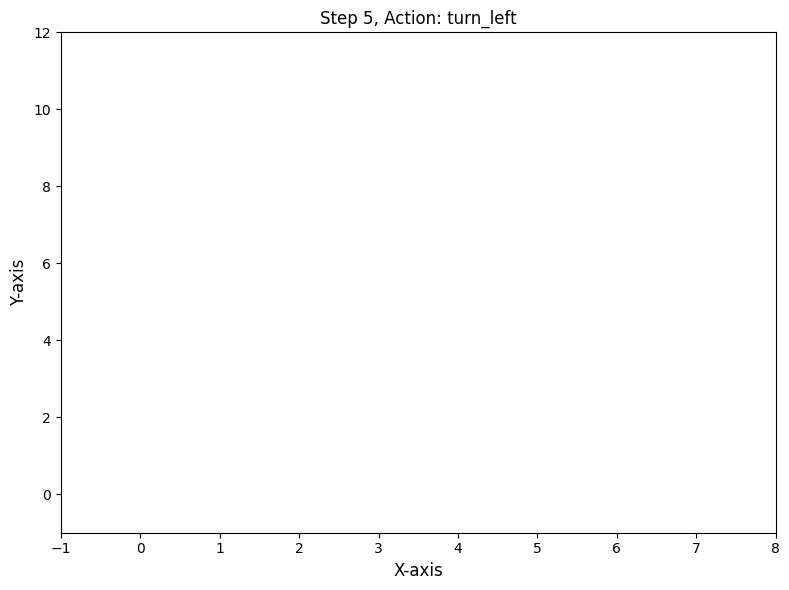

In [22]:
import matplotlib.pyplot as plt
import matplotlib

# 폰트 설정 초기화 (경고 방지)
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']  # matplotlib 기본 폰트

import matplotlib.pyplot as plt

def setup_basic_plot(step_num=1, action="forward"):
    # 캔버스 설정
    fig, ax = plt.subplots(figsize=(8, 6))


    # 축 범위 설정
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)

    # 제목과 라벨 설정 (fontsize=12)

    ax.set_xlabel('X-axis', fontsize=12)
    ax.set_ylabel('Y-axis', fontsize=12)
    ax.set_title(f'Step {step_num}, Action: {action}', fontsize=12)

    # 레이아웃 최적화
    plt.tight_layout()

    return ax

# 실행 구문
if __name__ == "__main__":
    setup_basic_plot(5, "turn_left")
    plt.show()


# 2번째

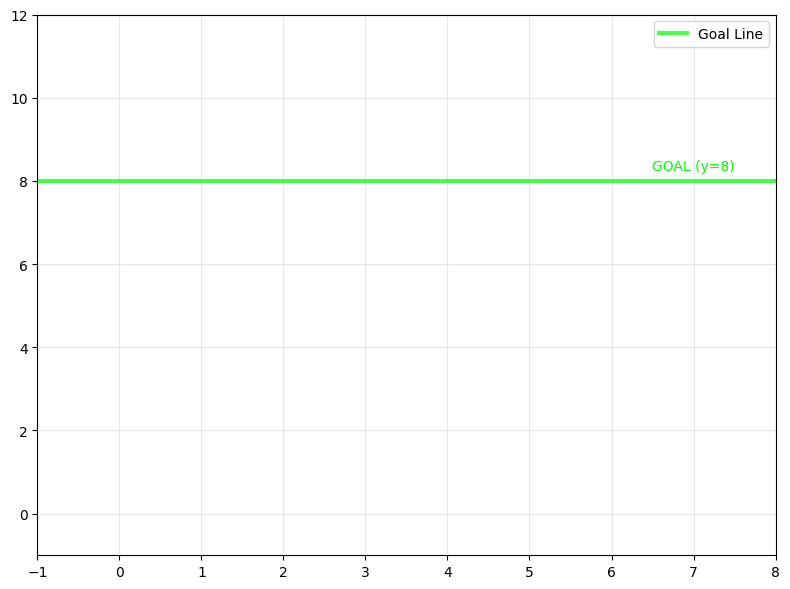

목표선 y 좌표: 8


In [21]:
import matplotlib.pyplot as plt
import matplotlib

# 폰트 설정 초기화 (경고 방지)
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']  # matplotlib 기본 폰트

import matplotlib.pyplot as plt

def draw_goal_line(obstacles):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)
    ax.grid(True, alpha=0.3)

    if obstacles:
        max_y = max(y for x, y in obstacles)
    else:
        max_y = 0

    goal_y = max_y + 3

    ax.axhline(y=goal_y, color='lime', linewidth=3, alpha=0.7, label='Goal Line')
    ax.text(7, goal_y + 0.2, f"GOAL (y={goal_y})", color='lime', ha='center', va='bottom')

    ax.legend()
    plt.tight_layout()
    plt.show()

    return goal_y

# 실행 예시
obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}
goal_y = draw_goal_line(obstacles)
print("목표선 y 좌표:", goal_y)


# 3번째

🔹 Obstacle 1: Position = (4, 5)
🔹 Obstacle 2: Position = (3, 3)
🔹 Obstacle 3: Position = (3, 2)
🔹 Obstacle 4: Position = (2, 4)


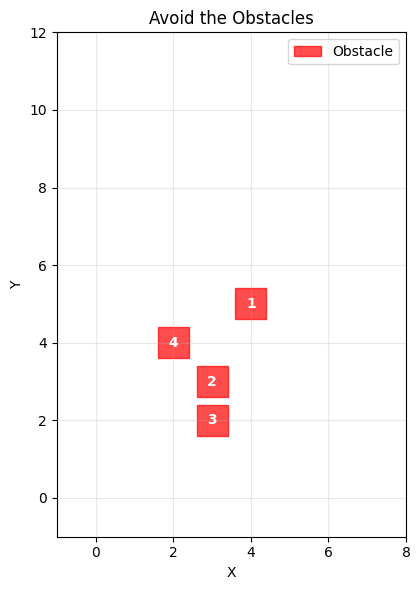

In [20]:
import matplotlib.pyplot as plt
import matplotlib

# 폰트 설정 초기화 (경고 방지)
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']  # matplotlib 기본 폰트

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def draw_obstacles(obstacles):
    # 타입 확인 및 변환
    if isinstance(obstacles, set):
        obstacles = list(obstacles)

    # 캔버스 설정
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title("Avoid the Obstacles")  # 그래프 제목 변경

    # 장애물 그리기
    for idx, (x, y) in enumerate(obstacles):
        rect = Rectangle((x - 0.4, y - 0.4), 0.8, 0.8,
                         color='red', alpha=0.7,
                         label='Obstacle' if idx == 0 else None)
        ax.add_patch(rect)

        # 텍스트: 번호
        ax.text(x, y, str(idx + 1), color='white', weight='bold',
                ha='center', va='center')

        # 콘솔 출력
        print(f"🔹 Obstacle {idx + 1}: Position = ({x}, {y})")

    # 범례 추가
    ax.legend()

    # 레이아웃 최적화 및 출력
    plt.tight_layout()
    plt.show()

# 실행 예시
obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}
draw_obstacles(obstacles)


# 4번째

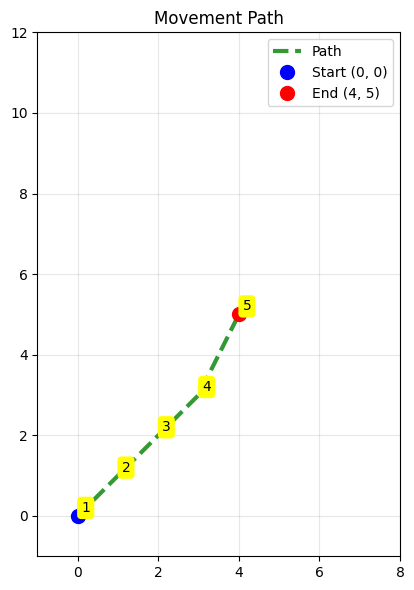

In [23]:
import matplotlib.pyplot as plt

def draw_path(path):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title("Movement Path")

    # 경로가 2개 이상일 경우 선 그리기
    if len(path) >= 2:
        path_x = [x for x, y in path]
        path_y = [y for x, y in path]
        ax.plot(path_x, path_y, 'g--', linewidth=3, alpha=0.8, label='Path')

    # 시작점 (파란 원)
    if path:
        start_x, start_y = path[0]
        ax.plot(start_x, start_y, 'bo', markersize=10, label=f'Start ({start_x}, {start_y})')

    # 끝점 (빨간 원)
    if len(path) >= 2:
        end_x, end_y = path[-1]
        ax.plot(end_x, end_y, 'ro', markersize=10, label=f'End ({end_x}, {end_y})')

    # 각 점에 번호 표시
    for idx, (x, y) in enumerate(path):
        ax.text(x + 0.2, y + 0.2, str(idx + 1),
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", edgecolor="none"),
                ha='center', va='center')

    ax.legend()
    plt.tight_layout()
    plt.show()

# 실행 예시
path = [(0, 0), (1, 1), (2, 2), (3, 3), (4, 5)]
draw_path(path)


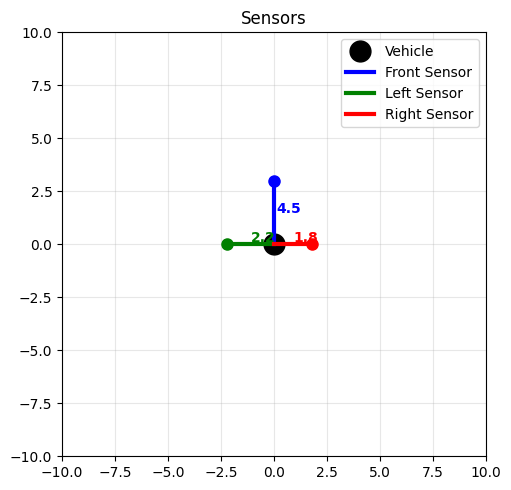

In [24]:
import matplotlib.pyplot as plt

def draw_sensors(x, y, sensors):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.grid(True, alpha=0.3)
    ax.set_title("Sensors")
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')

    # 차량 위치 표시 (검은색 원)
    ax.plot(x, y, 'ko', markersize=15, label="Vehicle")

    # 최대 센서 길이
    sensor_length = 3

    # 전방 센서
    if 'front' in sensors:
        front_reach = min(sensors['front'], sensor_length)
        ax.plot([x, x], [y, y + front_reach], 'b-', linewidth=3, label="Front Sensor")
        ax.plot(x, y + front_reach, 'bo', markersize=8)  # 끝점 원
        ax.text(x + 0.1, y + front_reach / 2, f'{sensors["front"]:.1f}',
                color='blue', fontweight='bold')

    # 좌측 센서
    if 'left' in sensors:
        left_reach = min(sensors['left'], sensor_length)
        ax.plot([x, x - left_reach], [y, y], 'g-', linewidth=3, label="Left Sensor")
        ax.plot(x - left_reach, y, 'go', markersize=8)
        ax.text(x - left_reach / 2, y + 0.1, f'{sensors["left"]:.1f}',
                color='green', fontweight='bold')

    # 우측 센서
    if 'right' in sensors:
        right_reach = min(sensors['right'], sensor_length)
        ax.plot([x, x + right_reach], [y, y], 'r-', linewidth=3, label="Right Sensor")
        ax.plot(x + right_reach, y, 'ro', markersize=8)
        ax.text(x + right_reach / 2, y + 0.1, f'{sensors["right"]:.1f}',
                color='red', fontweight='bold')

    ax.legend()
    plt.tight_layout()
    plt.show()

# 예시 실행
sensors = {
    'front': 4.5,
    'left': 2.2,
    'right': 1.8
}
draw_sensors(0, 0, sensors)


# 간단한 지도학습 기반 자율주행 모형을 보여주는 예제 코드

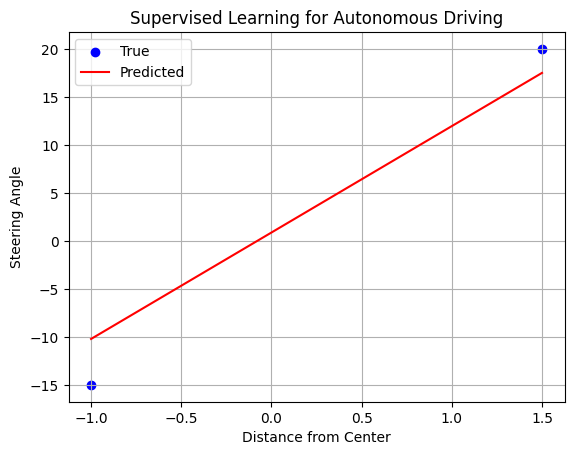

예측 조향각 (편차 -1.2): -12.43도


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = np.array([[-2], [-1], [0], [1], [2], [3], [-3], [-1.5], [1.5], [0.5]])  # 도로 중심선과 거리
y = np.array([-25, -15, 0, 15, 25, 30, -30, -18, 20, 10])  # 조향각


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


plt.scatter(X_test, y_test, color='blue', label='True')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Distance from Center')
plt.ylabel('Steering Angle')
plt.title('Supervised Learning for Autonomous Driving')
plt.legend()
plt.grid(True)
plt.show()


test_input = np.array([[-1.2]])
predicted_angle = model.predict(test_input)
print(f"예측 조향각 (편차 -1.2): {predicted_angle[0]:.2f}도")